In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 1: Load the dataset
DATA_PATH = "/kaggle/input/creditcard/creditcard.csv"
data = pd.read_csv(DATA_PATH)

# Step 2: Confirm that the dataset has been loaded successfully
print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


In [4]:
# Step 3: Display basic information about the dataset
data_info = data.info()  # Provides column data types and non-null counts
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:
# Step 5: Get unique values of the 'Class' column
unique_classes = data['Class'].unique()
print("Unique values in the 'Class' column:", unique_classes)

Unique values in the 'Class' column: [0 1]


In [7]:
# Step 6: Scale the 'Amount' and 'Time' columns
# The 'Amount' and 'Time' columns should be scaled because they have different ranges from the other features
data['Normalized_Amount'] = StandardScaler().fit_transform(data[['Amount']])
data['Normalized_Time'] = StandardScaler().fit_transform(data[['Time']])

# Step 7: Drop the original 'Amount' and 'Time' columns
data = data.drop(columns=['Amount', 'Time'])

# Step 8: Preview the first few rows after scaling
print(data.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  Normalized_Amount  Normalize

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


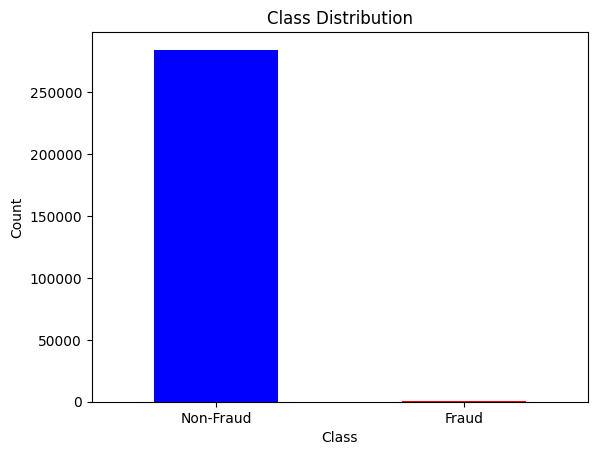

In [8]:
class_counts = data['Class'].value_counts()
class_counts.plot(kind='bar', color=['blue', 'red'])

# Step 10: Display class proportions
class_proportions = data['Class'].value_counts(normalize=True)
print(class_proportions)

# Step 11: Customize the plot
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0)
plt.show()

In [9]:
# Step 12: Separate features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Step 13: Check class distribution before SMOTE
print("Class distribution before SMOTE:\n", y.value_counts())

# Step 14: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 15: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 16: Check class distribution after SMOTE
print("Class distribution after SMOTE:\n", pd.Series(y_train_smote).value_counts())

Class distribution before SMOTE:
 Class
0    284315
1       492
Name: count, dtype: int64
Class distribution after SMOTE:
 Class
0    227451
1    227451
Name: count, dtype: int64


In [10]:
print("Shape of X_train before SMOTE:", X_train.shape)
print("Shape of X_train after SMOTE:", X_train_smote.shape)

# Step 18: Preview the data after SMOTE
print(X_train_smote.head())
print(y_train_smote.head())

Shape of X_train before SMOTE: (227845, 30)
Shape of X_train after SMOTE: (454902, 30)
         V1        V2        V3        V4        V5        V6        V7  \
0  1.946747 -0.752526 -1.355130 -0.661630  1.502822  4.024933 -1.479661   
1  2.035149 -0.048880 -3.058693  0.247945  2.943487  3.298697 -0.002192   
2 -0.991920  0.603193  0.711976 -0.992425 -0.825838  1.956261 -2.212603   
3  2.285718 -1.500239 -0.747565 -1.668119 -1.394143 -0.350339 -1.427984   
4 -0.448747 -1.011440  0.115903 -3.454854  0.715771 -0.147490  0.504347   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  1.139880  1.406819 -0.157403  ...  0.076197  0.297537  0.307915  0.690980   
1  0.674782  0.045826  0.284864  ...  0.038628  0.228197  0.035542  0.707090   
2 -5.037523  0.000772 -2.009561  ... -2.798352  0.109526 -0.436530 -0.932803   
3  0.010010 -1.118447  1.756121  ... -0.139670  0.077013  0.208310 -0.538236   
4 -0.113817 -0.044782 -0.558955  ... -0.243245 -0.173298 -0.00

In [11]:
# Step 19: Logistic Regression Model
# Train a Logistic Regression model
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train_smote, y_train_smote)

# Step 20: Evaluate Logistic Regression Model
y_pred_lr = model_lr.predict(X_test)
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_lr))
print("\nROC-AUC Score (Logistic Regression):", roc_auc_score(y_test, model_lr.predict_proba(X_test)[:, 1]))

Confusion Matrix (Logistic Regression):
 [[55403  1461]
 [    8    90]]

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962


ROC-AUC Score (Logistic Regression): 0.9698873359135438


In [12]:
model_nn = Sequential([
    Dense(32, activation='relu', input_dim=X_train_smote.shape[1]),  # Input layer
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(16, activation='relu'),  # Hidden layer
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 22: Compile the Neural Network Model
model_nn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 23: Summarize the model
model_nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model_nn.fit(
    X_train_smote, y_train_smote,
    epochs=50,  # Number of iterations through the training data
    batch_size=32,
    validation_split=0.2,  # Use 20% of the training data for validation
    verbose=1
)

# Step 25: Evaluate the Neural Network Model on the test set
test_loss, test_accuracy = model_nn.evaluate(X_test, y_test)
print(f"Test Loss (Neural Network): {test_loss}")
print(f"Test Accuracy (Neural Network): {test_accuracy}")

# Step 26: Predict probabilities and convert to class labels
y_pred_probs_nn = model_nn.predict(X_test)
y_pred_nn = (y_pred_probs_nn >= 0.5).astype(int)

# Step 27: Confusion Matrix and Classification Report for Neural Network
cm_nn = confusion_matrix(y_test, y_pred_nn)
print("Confusion Matrix (Neural Network):\n", cm_nn)
print("\nClassification Report (Neural Network):\n", classification_report(y_test, y_pred_nn))

Epoch 1/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9389 - loss: 0.1530 - val_accuracy: 0.9985 - val_loss: 0.0277
Epoch 2/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9854 - loss: 0.0397 - val_accuracy: 0.9986 - val_loss: 0.0184
Epoch 3/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9878 - loss: 0.0336 - val_accuracy: 0.9932 - val_loss: 0.0291
Epoch 4/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9885 - loss: 0.0324 - val_accuracy: 0.9986 - val_loss: 0.0175
Epoch 5/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9888 - loss: 0.0314 - val_accuracy: 0.9978 - val_loss: 0.0227
Epoch 6/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9892 - loss: 0.0306 - val_accuracy: 0.9997 - val_loss: 0.0146
Epoch 7/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9897 - loss: 0.0286 - val_accuracy: 1.0000 - val_loss: 0.0125
Epoch 8/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Neural Network)')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (Neural Network)')
plt.legend()
plt.show()

In [ ]:
#ROC-AUC evaluates the model's ability to distinguish between classes
#(fraud vs non-fraud) by focusing on the true positive rate
#(recall) and false positive rate. AUPRC is more focused on the model’s
#performance for the minority class and is better suited for imbalanced datasets
y_scores_lr = model_lr.predict_proba(X_test)[:, 1]

# Predict probabilities for the test set (Neural Network)
y_scores_nn = model_nn.predict(X_test)  # Get probabilities (output of sigmoid)

# Ensure y_scores_nn is flattened
y_scores_nn = y_scores_nn.flatten()

# Define a range of thresholds
thresholds = np.linspace(0, 1, 20)  # Generate 20 thresholds between 0 and 1

# Function to plot confusion matrices for different thresholds
def plot_confusion_matrices(thresholds, y_test, y_scores, model_name):
    fig, axes = plt.subplots(4, 5, figsize=(20, 20))  # Create a grid of 4x5 plots
    axes = axes.ravel()  # Flatten the axes for easy iteration

    for i, threshold in enumerate(thresholds):
        # Generate predictions based on the threshold
        y_pred = (y_scores >= threshold).astype(int)
        
        # Compute the confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Plot the confusion matrix
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f"{model_name} - Threshold: {threshold:.2f}")
        axes[i].set_xlabel("Predicted")
        axes[i].set_ylabel("Actual")

    plt.tight_layout()
    plt.show()

# Plot confusion matrices for Logistic Regression
plot_confusion_matrices(thresholds, y_test, y_scores_lr, "Logistic Regression")
print()
print()
# Plot confusion matrices for Neural Network
plot_confusion_matrices(thresholds, y_test, y_scores_nn, "Neural Network")